# Basic plotting with Pandas
Pandas supports some useful plotting function which are actually a subset of the Matplotlib package's more substantial plotting capabilities. And so, we'll begin our exploration of plotting with Pandas and in doing so distill plots into their fundamental components.

We will use a dataset listing 2010 water consumption by sector for each state with categories for fresh vs saline water usage. This data also includes a column listing the state's population. From this dataset, we'll generate a number of different plots and explore the components of these plots and how they are controlled. 

## 1. Analysis set up

In [1]:
#Import pandas
import pandas as pd

In [2]:
#Set images to display inline
%matplotlib inline

In [3]:
#Read the data into a data frame
dfWaterUse = pd.read_csv('./data/State_Data_Formatted_All.csv')
dfWaterUse.head()

,State,Source,Type,Category,Withdrawal_MGD,Population
0,Alabama,Surface,Fresh,Total,9470.0,4780000
1,Alaska,Surface,Fresh,Total,391.0,710000
2,Arizona,Surface,Fresh,Total,3540.0,6390000
3,Arkansas,Surface,Fresh,Total,3540.0,2920000
4,California,Surface,Fresh,Total,18800.0,37300000


## 2. Data exploration
Before making plots, it's useful to see what values we have in various columns. The number of values will affect what kinds of plots we want to make: too many unique values may make our plot overly complex and unreadable. 

### Exploring the number of unique category values in our data...
Plots simplify data to convey a message. Thus if the plot has too many categories, the message may get muddled. Let's begin our exploration by looking at the various categories we can use to reduce our data. 

In [4]:
#List unique values in the Type field
dfWaterUse['Type'].unique()

array(['Fresh', 'Saline'], dtype=object)

In [5]:
#List number of unique values in the Category field
dfWaterUse['Category'].nunique()

9

In [6]:
#List number of unique values in the Category field
dfWaterUse['State'].nunique()

53

So, we have two "Types" and nine "Categories". That seems manageable for some simple plots using these as axes. Plotting with "States" as an axis (n=53) may be a bit too complex for some basic plots though... 

 ### Evaluate useful groupings and subsets of data...
Now that we've explored the number of unique values in various categorical columns, we can mull various ways of grouping data and perhaps filtering records into particular subsets. 

One example, related to exploring our data, might be to display the number of records in each category. This is done with the Pandas `value_counts()` command. 

In [7]:
#Reveal the number of records within each unique "Category"
dfWaterUse['Category'].value_counts()

Total             424
Aquaculture       318
Industrial        212
Thermoelectric    212
Irrigation        212
Public Supply     212
Mining            212
Self Supplied     212
Livestock         212
Name: Category, dtype: int64

Here we see that two categories have more records than the others. But, what if we ask that question a slightly different way: What if we wanted to list the number of records in each category that reflect a non-zero water withdrawal? 

In [8]:
#Filter for records where withdrawal is greater than zero and show the number of records by category
dfNonZero = dfWaterUse.query('Withdrawal_MGD > 0')
dfNonZero['Category'].value_counts()

Total             298
Aquaculture       154
Thermoelectric    124
Mining            122
Irrigation        104
Public Supply     104
Livestock          98
Self Supplied      61
Industrial         57
Name: Category, dtype: int64

That result tells a different story: it shows that while we have the same number of measurements for many categories, some categories reflect no withdrawals...

## Plotting
The above table is easy enough to read and interpret, but we can plot the data to tell the same story much more effectively. And we can creat these plots fairly quickly with Pandas commands...

We'll start simple, and then modify our plot commands to get to a more effective communication device. First we'll convert our table of value counts to its own variable (a Pandas series object), and then explore Pandas `dataframe.plot()` command.

In [9]:
dfCounts = dfNonZero['Category'].value_counts()

#### Plot types

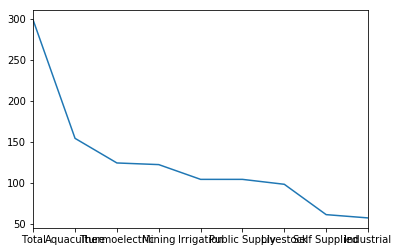

In [10]:
#Plot the number of records in each category; default is line
dfCounts.plot();

Documentation on the Pandas `plot()` command is here:<br>https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html. 

Have a look at the command's arguments, particularly the `kind` arcgument. The default is `line`. 

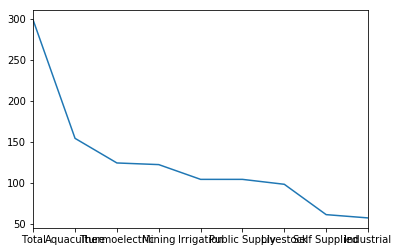

In [11]:
#Same as above, but the "kind" parameter is explicit
dfCounts.plot(kind='line');

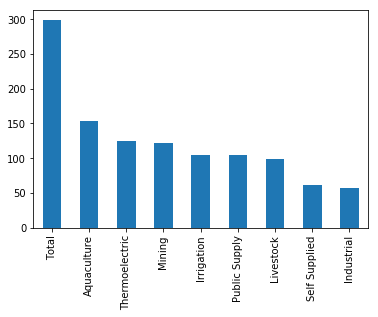

In [12]:
#Change plot types by changing the kind value to "bar"
dfCounts.plot(kind='bar');

► Try some other plot types: `barh`, `box`, `pie`, `scatter`

Some of these types make sense, others do not given our data. Some types (e.g. `scatter`) won't even work. _Different plot types have different uses_:
 * <u>Line plots</u> are good for tracking change over time; the x-axis is continuous. 
 * <u>Bar and horizontal bar plots</u> can also track change over time, but here the x-axis (or y, if horizontal) is discrete, not continuous, so the time would be in blocks. These plots are also good for comparing values associated with various groups. 
 * <u>Pie charts</u> do not show change (no x-axis!) but are good at showing parts of a whole. 
 
There are many other types of plots and charts, of course, and each has a best case scenario. Check the literature for a more in-depth discussion on this. For example: see Stephanie Evergreen's [Chart Chooser utilities](http://stephanieevergreen.com/tag/chart-chooser/) for some ideas.


#### Plot colors
Refering back to the Pandas documentation, we see another plot argument is `color`...

* Change the color of the bars in the horizontal bar plot with the `color` option. You can use any named color shown here: https://matplotlib.org/examples/color/named_colors.html, or you can specify a color by it's hexcode (see https://htmlcolorcodes.com/) preceded by a `#`, e.g. `#ff5733`. Try changing the color below to `maroon`.

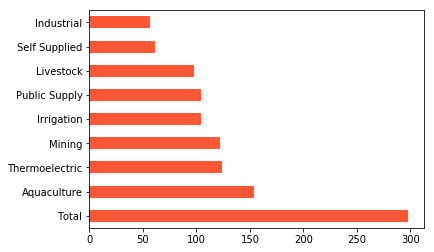

In [13]:
dfCounts.plot(kind='barh',color='#ff5733');

#### Plot canvas size
* Change the size of the plot with `figsize=()`. Supply a tuple of width and height to change the size of your plot. Values are somewhat arbitrary, so play around. (Also note that I've changed the format of the command, putting parameters on separate lines to make it more readable...) 

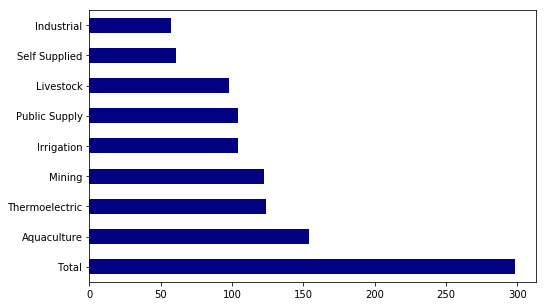

In [14]:
dfCounts.plot(kind='barh',
              color='navy',
              figsize=(8,5));

#### Colormaps

* *Colormaps* apply a suite of colors to values in a plot. Below is an example of applying a colormap to our pie chart. 

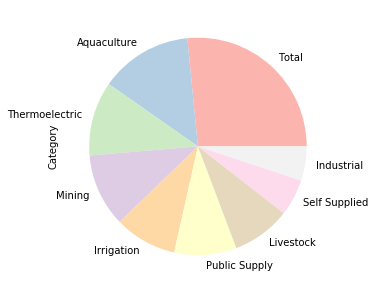

In [15]:
dfCounts.plot(kind='pie',
              colormap ='Pastel1',
              figsize=(5,5));

There are 3 classes of colormap, each with its own use:
 * **Sequential** colormaps have a change of lightness over one color. They used for continuous, ordered values.
 * **Diverging** colormaps are used when the information being plotted deviates around a middle value. Here there are often two different colors being used.
 * **Qualitative** colormaps are for unordered, categorical data.
 
See this link for a nice discussion:
https://matplotlib.org/users/colormaps.html

#### Labels

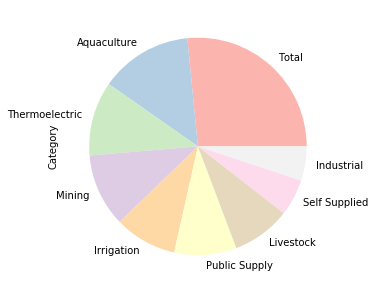

In [16]:
dfCounts.plot(kind='pie',
              colormap ='Pastel1',
              title='',
              figsize=(5,5));

## Recap: Plotting with Pandas
We can actually continue digging deeper into the subcommands of the Panda's plot function. But as we dig deeper, we are really just crossing over more into the `Matplotlib` package. (In fact, the Pandas plot command is really just a simplified interface to Matplotlib. 

So... let's just take the plunge and begin discussing that package.